# Intent based prompt calibration

#### Members' : Muhammad Uzair Warraich & Muhammad Al Batayneh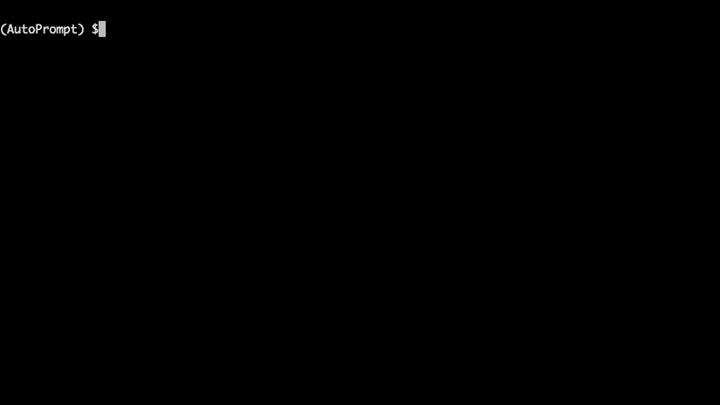

####  Emails:

###uzair.wararaich@torontomu.ca & malbatayneh@torontomu.ca

# Introduction:

#### Problem Description:

Recent advancements in Large Language Models (LLMs) have showcased significant improvements in generative tasks, yet these models remain highly sensitive to the specific prompts provided by users. This sensitivity manifests as variations in performance not only when prompts are slightly altered, but also when model versions change, leading to unpredictable shifts in behavior across a spectrum of tasks. Current strategies to address this include the use of soft prompts and meta-prompts that require iterative optimization and deep access to the LLMs themselves. However, these methods depend heavily on large, high-quality benchmarks which are often unavailable in real-world scenarios and are costly to iterate over. Moreover, without adequate calibration to user intentions, LLMs might produce inaccurate outputs due to misunderstood prompts.

This project introduces the Intent-based Prompt Calibration (IPC) system based on the paper "Intent-based Prompt Calibration: Enhancing prompt
optimization with synthetic boundary cases" [4], designed to refine and optimize prompts based on synthetic boundary examples specifically generated to encapsulate the user’s task requirements. This system not only aims to mitigate the challenge of prompt sensitivity but also adapts the LLM's output to more accurately reflect the user's intended use case, particularly in environments like content moderation where data distributions are typically imbalanced. The IPC system also incorporates a novel ranking mechanism to further enhance prompt optimization for generative tasks, reducing reliance on extensive manual annotation and large-scale data requirements.
#### Context of the Problem:


The importance of addressing prompt sensitivity in Large Language Models (LLMs) is multifaceted. Firstly, it enhances reliability and predictability, essential for consistent AI performance across various applications. Secondly, it promotes scalability and efficiency, enabling LLMs to be fine-tuned for specific tasks without extensive resources, thereby reducing computational and economic costs. Thirdly, optimizing prompts to align with user intentions allows for customized, effective solutions, crucial for broadening AI applicability and user satisfaction. Lastly, tackling this issue aids in democratizing AI technology, ensuring more organizations can leverage these advancements with less specialized knowledge, and improving model explainability and transparency for ethical AI practices. Addressing these challenges is vital for the practical and ethical deployment of LLMs in real-world scenarios.
#### Limitation About other Approaches:

Write a sentence or two about limitations of prior appraoches (you will provide their details in the background section next)

#### Solution:

The method discussed above addresses the limitations of previous approaches by introducing a system that iteratively generates challenging boundary cases and refines prompts based on user feedback and synthetic examples. This system does not require extensive datasets or direct access to the model's internals, making it adaptable and efficient for real-world applications. By focusing on synthetic data generation and iterative calibration, it also minimizes the need for large, expensive benchmarks, thereby enhancing accessibility and reducing optimization costs.

# Background

Explain the related work using the following table

| Reference |Explanation |  Dataset/Input |Weakness
| --- | --- | --- | --- |
| Pi Liang et al. [1] | Task-specific Embedding (Continuous and Discrete)	| E2E , WebNLG, DART| Requires direct access to the LLM, making it less feasible for proprietary models with restricted access.
| M.Deng et al. [2] | Reinforcement Learning	| Yelp sentiment transfer dataset | 	Depends on access to generated tokens' probabilities or a large dataset, which can be resource-intensive and impractical in real-world scenarios.
| R.Pryzant et al. [3] | LLMs for Prompt Optimization		| Yelp Polarity| 	Still requires robust benchmarks to evaluate and compare prompts effectively, which may not always be available or feasible to construct..
| Elad Levi et al. [4] | Optimizing prompts through iterative calibration based on user intent and synthetic data		| IMDB review dataset | 	Covered in the Future work section


The last row in this table should be about the method discussed in this paper (If you can't find the weakenss of this method then write about the future improvement, see the future work section of the paper)

# Methodology

**Initial Prompt and Task Description**: The process begins with the user providing an initial prompt and a task description. Optionally, the user can also supply a few examples in a few-shot setting, which helps the system understand the context and requirements better.

**Sample Generator**: Using the initial data, the sample generator creates challenging and diverse boundary cases for the task. This is done to test the robustness of the current prompt and to identify any ambiguities or inaccuracies in prompt interpretation. The generator leverages a meta-prompt, which evolves over iterations based on the history of previous prompts and their performance.

**Evaluator**: Once the synthetic samples are generated, the evaluator assesses the current prompt's effectiveness on this generated dataset. This evaluation typically involves analyzing the prompt's accuracy using a confusion matrix and identifying misclassifications. This step is crucial for understanding the strengths and weaknesses of the current prompt.

**Analyzer**: This component receives the results from the evaluator, including prompt scores and detailed error analysis. It synthesizes this information into a comprehensive analysis summary, highlighting major failure cases and suggesting areas for prompt refinement.

**Prompt Generator:** With the analysis and historical performance data in hand, the prompt generator then suggests a new prompt. This prompt is designed to address the deficiencies identified in the previous iteration, with the aim of achieving a higher score in subsequent evaluations.

**Iteration and Optimization:** The calibration optimization process is iterative. It repeats the cycle of generating samples, evaluating the prompt, analyzing performance, and generating a new prompt. This loop continues until there is no significant improvement in prompt performance or a maximum number of iterations is reached.



# Implementation

Implementation code of this paper requries access to openAI API key as well as a docker instance of Argilla created either in huggingface space or locally. For that reason I cannot run the code in the google colab instance without having a colab Pro subscription which would give me access to the VM command line.

The github repo(git clone https://github.com/uzairwarraich/NLPProject_AutoPrompt.git) contains all the code and instructions of how to run the code.
**NOTE**: Easier to run the code locally or in a VM, since for annotation Argilla is used, and for Argilla service web browser is required.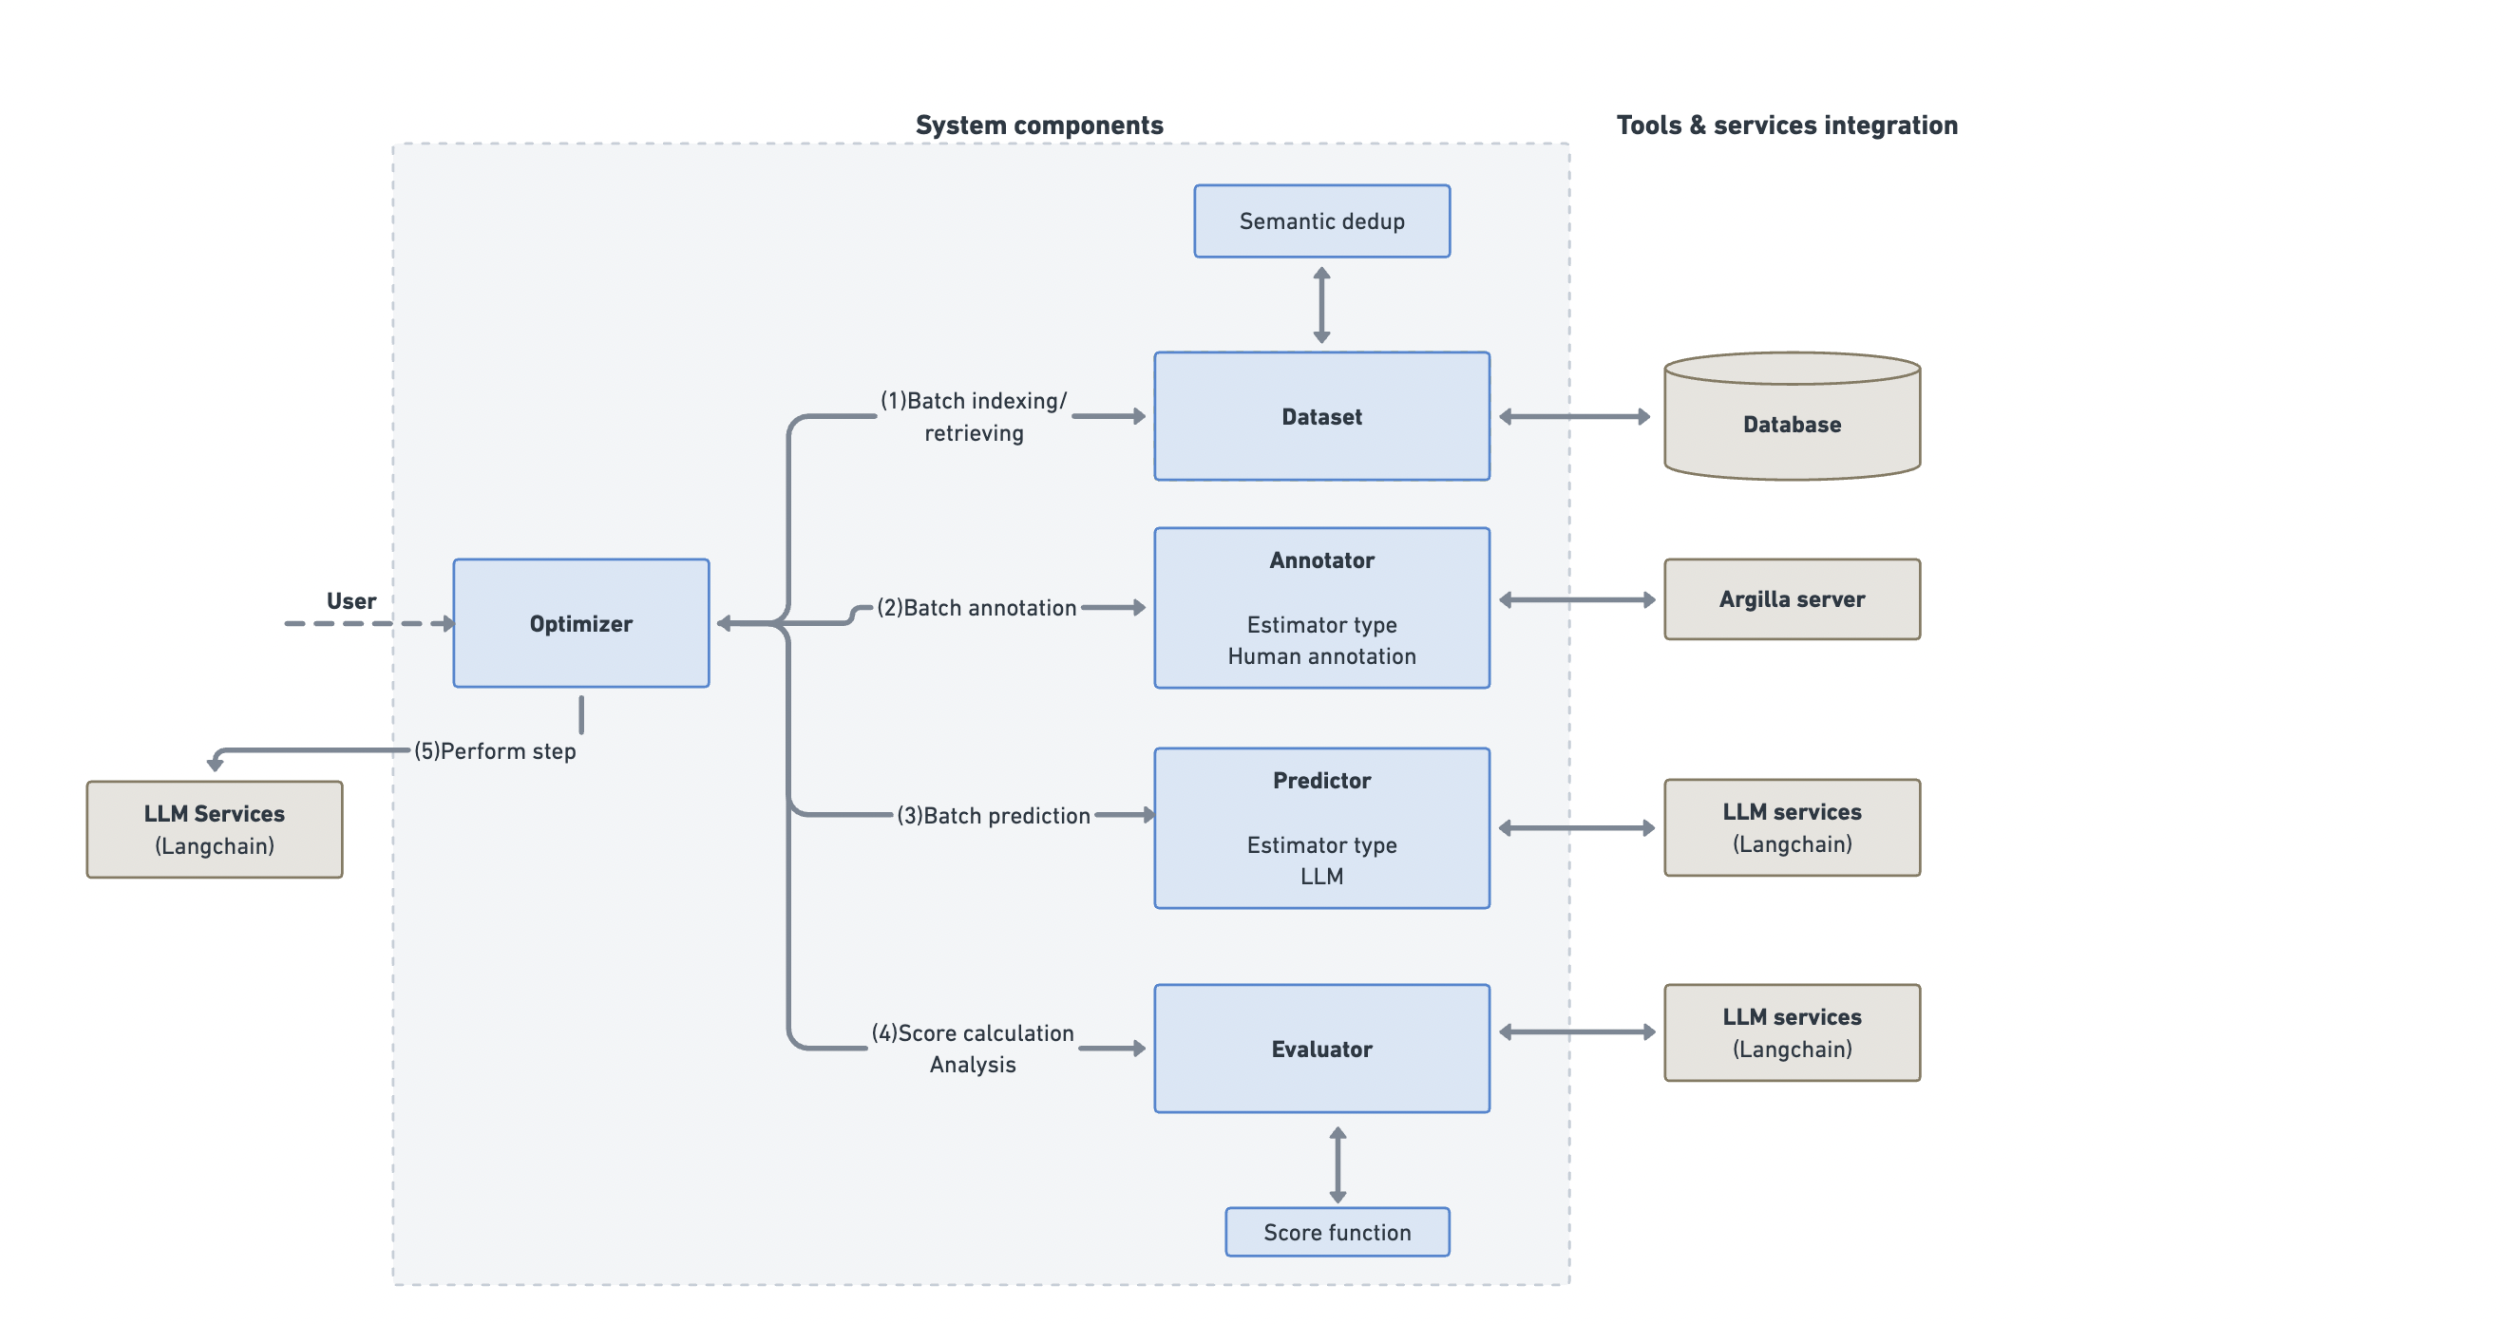

1.Configure your labels by editing config/config_default.yml. Modify the label_schema in the dataset section to include only 'Yes' and 'No' options.
dataset:
  

```
  name: 'dataset'
    records_path: null
    initial_dataset: 'dump/dataset.csv'
    label_schema: ["Yes", "No"]
    max_samples: 50
```
2.Run the main pipeline from an IDE or the command line, giving the initial prompt and task description



```
python run_pipeline.py \
 --prompt "Does this movie review contain a spoiler? answer Yes or No" \
    --task_description "Assistant is an expert classifier that will classify a movie review, and let the user know if it contains a spoiler for the reviewed movie or not."

```

3.A browser window displaying the Argilla workspace will open for manual annotations
  
Annotate the generated examples as they appear and monitor the pipeline's progress. Control the number of optimization iterations with the num_steps parameter, specified at start:



```
 python run_pipeline.py --num_steps 30
```


> python run_pipeline.py --num_steps 30
The pipeline concludes after reaching the num_steps or meeting a predefined stop criteria, defined in config/config_default.yml:

Stop_criteria:


```
    max_usage: 0.5  # Max budget for optimization (USD for OpenAI's LLM model)
    patience: 3     # Number of iterations to wait for improvement
    min_delta: 0.05 # Minimum improvement between iterations
```

#####The diagram below and above shows how  the proposed method in the paper is executed for prompt calibration.First, someone gives the system a starting prompt, which is just a question or task they want the language model to answer or do.Next, the system creates some tricky examples based on that initial prompt to test how well it works.Then, either** a person** or **the language model itself** looks at these examples and adds notes or corrections. After that, the system checks how well the prompt worked with these examples.Based on what it learned from the last prompt, the system suggests a new, better prompt.This whole process keeps repeating—giving prompts, testing them, and improving them—until the system decides it’s found the best possible way to ask the question.Finally, the system presents this refined, well-tuned prompt.


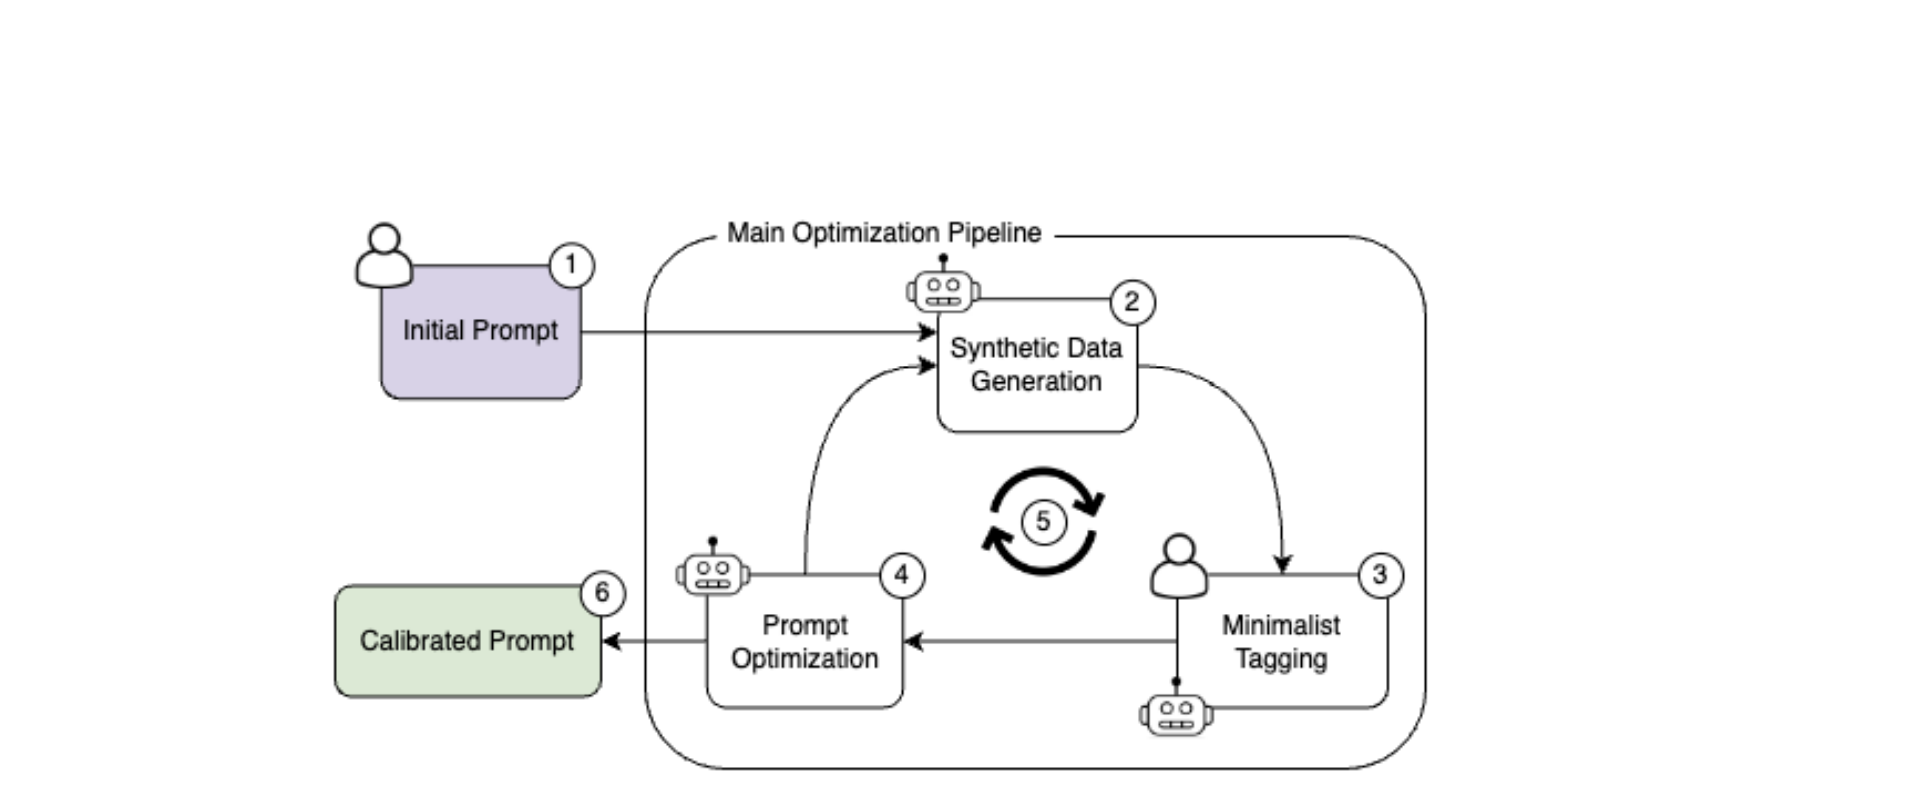

###User also has the option of providing with initial examples and employing the few-shot prompting method. The optimization process is terminated when either there is no improvement in the last few steps, or when the maximum number of iterations has been reached.

##Prompt generation pipeline:



**Dataset Component:** This part of the system manages all the data operations like adding, modifying, or deleting data entries. It also cleans up the dataset by removing duplicate entries and sampling it effectively to ensure quality. The dataset operations are optimized for handling smaller datasets and are managed using a local database system like pandas.

**Estimator/Annotator Component:** This component estimates or evaluates a set of data samples. It's implemented in two forms: one for making initial predictions and another for annotating these predictions(Using Argilla UI here)[7]. It's versatile, meaning it can be adapted for various uses such as refining prompts or merging multiple prompts into a more effective single one. The Estimator can use human input via a user interface(Argilla)[7] for annotations, or it can automatically generate estimates using LLMs (Large Language Models) integrated through a tool called Langchain. It also supports processing multiple samples at once to save costs and time.

**Evaluator Component:** After data is estimated or annotated, the Evaluator checks the quality of these outputs. It uses a generic function that can be applied to different tasks to assess each data entry, identify errors, and analyze them. This helps in understanding where the system might be going wrong and how it can be improved.

**Optimizer Component:** This is the core of the system where the actual optimization of prompts takes place. It follows the iterative steps laid out in the process—reviewing the results, making adjustments, and trying again. The optimization continues until the system meets certain criteria such as no further improvements (convergence) or reaching a limit on resources like cost or computation (usage limit).

#Evalulation

They used a high-capacity model, GPT-4 Turbo, to create ground truth data. This step is crucial as it provides a benchmark for comparing the effectiveness of different prompts. In addition they used adversarial synthetic data generated from 10 initial samples from the IMDB dataset. It involves creating examples that are specifically designed to challenge or 'fool' the model. These are known as boundary cases.

After synthetic adversarial examples are generated by the system, human annotators evaluate these examples to determine how well they align with the intended task requirements and whether they effectively challenge the model. This helps in ensuring that the synthetic data is of high quality and truly representative of potential real-world complexities.

Human annotators also review the responses generated by the LLM based on the current prompts. They assess whether the responses are accurate, relevant, and appropriately detailed, providing a human judgment that can capture nuances possibly missed by automated metrics

Finally the metaprompts are adjusted based on the human annotations.

The researchers evaluate the effectiveness of their Intent-based Prompt Calibration (IPC) system using three binary classification tasks: spoiler detection, sentiment analysis, and parental guidance detection.

The proposed method outperformed other methods such as the OPRO[5] and PE[6].The other methods exhibit a higher variance in results, which suggests they may be less reliable or consistent, especially when the number of training samples is small. This variance can be detrimental in real-world applications where stable and predictable outputs are necessary.The other methods exhibit a higher variance in results, which suggests they may be less reliable or consistent, especially when the number of training samples is small. This variance can be detrimental in real-world applications where stable and predictable outputs are necessary.

# Conclusion and Future Direction

Future work could be done to refine the meta-prompts themselves. This involves improving how the meta-prompts are generated and used within the system to make them even more effective at guiding the prompt optimization process. All multimodality could be introduced to help the model generate better prompts with help images and audio.

In Conclusion, the paper offers valuable learnings about improving the efficiency and effectiveness of Large Language Models (LLMs) through refined prompt engineering. The most important part according to me was the use of synthetic data to generate boundary cases, which aids in iteratively refining prompts to better align with user intentions, thereby addressing the high sensitivity of LLMs to prompt variations. The IPC method showcases a modular and flexible system architecture, allowing for easy adaptation across different tasks and settings, including multi-modality and in-context learning. Additionally, the paper highlights the benefits of minimizing human annotation efforts by relying on synthetic data for prompt calibration, demonstrating significant improvements in model performance with fewer data requirements. These insights underscore the potential of IPC to enhance the practical utility of LLMs in diverse real-world applications, particularly in scenarios with limited data availability or specific performance criteria.







# References:

[1]: X. L. Li and P. Liang. Prefix-tuning: Optimizing continuous prompts for generation. In C. Zong,
F. Xia, W. Li, and R. Navigli, editors, Proceedings of the 59th Annual Meeting of the Association
for Computational Linguistics and the 11th International Joint Conference on Natural Language
Processing (Volume 1: Long Papers), pages 4582–4597, Online, Aug. 2021. Association for
Computational Linguistics.

[2]:  M. Deng, J. Wang, C. Hsieh, Y. Wang, H. Guo, T. Shu, M. Song, E. P. Xing, and Z. Hu.
Rlprompt: Optimizing discrete text prompts with reinforcement learning. In Y. Goldberg,
Z. Kozareva, and Y. Zhang, editors, Proceedings of the 2022 Conference on Empirical Methods
in Natural Language Processing, EMNLP 2022, Abu Dhabi, United Arab Emirates, December
7-11, 2022, pages 3369–3391. Association for Computational Linguistics, 2022.

[3]: R. Pryzant, D. Iter, J. Li, Y. Lee, C. Zhu, and M. Zeng. Automatic prompt optimization with
“gradient descent” and beam search. In H. Bouamor, J. Pino, and K. Bali, editors, Proceedings of
the 2023 Conference on Empirical Methods in Natural Language Processing, pages 7957–7968,
Singapore, Dec. 2023. Association for Computational Linguistics.

[4]: Elad Levi and Eli Brosh and Matan Friedmann . Intent-based Prompt Calibration: Enhancing prompt optimization with synthetic boundary cases,arXiv:2402.03099, 5 Feb 2024

[5]: C. Yang, X. Wang, Y. Lu, H. Liu, Q. V. Le, D. Zhou, and X. Chen. Large language models as
optimizers. CoRR, abs/2309.03409, 2023.

[6]: Q. Ye, M. Axmed, R. Pryzant, and F. Khani. Prompt engineering a prompt engineer, 2023.

[7]:D. Vila-Suero and F. Aranda. Argilla - open-source framework for data-centric nlp, 2023.
cff-version: 1.2.0, message: "If you use this software, please cite it as below.", date-released:
2023-01-12.